C:\Users\PC\AppData\Local\Temp\ipykernel_19496\1995915547.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora'] = pd.to_datetime(df['Hora']).dt.time


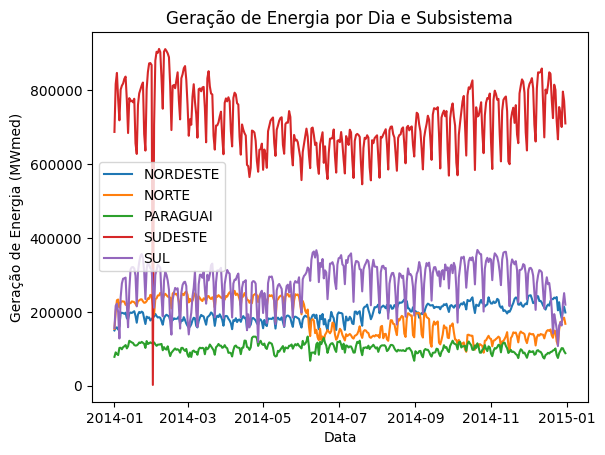

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv(
    filepath_or_buffer="https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA_2014.csv",
    sep=';'
)

# Dividir a coluna 'din_instante' em data e hora
df[['Data', 'Hora']] = df['din_instante'].str.split(' ', expand=True)

# Converter as colunas de data e hora para os tipos de dados adequados
df['Data'] = pd.to_datetime(df['Data'])
df['Hora'] = pd.to_datetime(df['Hora']).dt.time

# Agrupar por dia e Subsistema, calcular a geração diária total de energia para cada subsistema
geracao_diaria = df.groupby([df['Data'].dt.date, 'nom_subsistema'])['val_geracao'].sum().reset_index()

# Comando 1: Plotar gráficos de linha para cada subsistema
for subsistema, dados in geracao_diaria.groupby('nom_subsistema'):
    plt.plot(dados['Data'], dados['val_geracao'], label=subsistema)

plt.title('Geração de Energia por Dia e Subsistema')
plt.xlabel('Data')
plt.ylabel('Geração de Energia (MWmed)')
plt.legend()
plt.show()





C:\Users\PC\AppData\Local\Temp\ipykernel_19496\1550607674.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora'] = pd.to_datetime(df['Hora']).dt.time


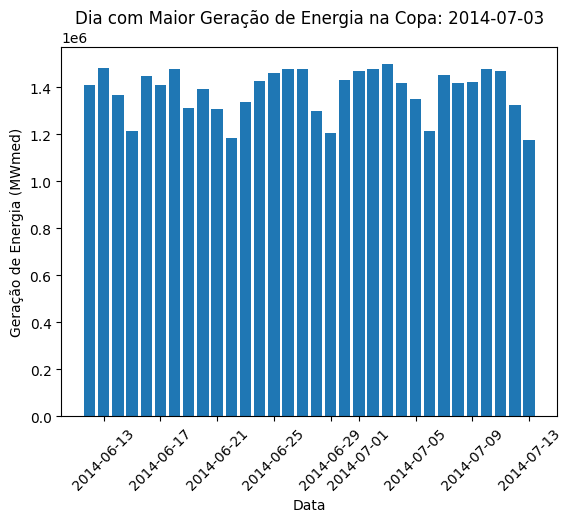

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv(
    filepath_or_buffer="https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA_2014.csv",
    sep=';'
)

# Dividir a coluna 'din_instante' em data e hora
df[['Data', 'Hora']] = df['din_instante'].str.split(' ', expand=True)

# Converter as colunas de data e hora para os tipos de dados adequados
df['Data'] = pd.to_datetime(df['Data'])
df['Hora'] = pd.to_datetime(df['Hora']).dt.time

# Comando 2: Filtre os dados para o período da Copa do Mundo de 2014
inicio_copa = pd.to_datetime('2014-06-12')
fim_copa = pd.to_datetime('2014-07-13')
df_copa = df[(df['Data'] >= inicio_copa) & (df['Data'] <= fim_copa)]

# Calcule a geração total de energia para cada dia dentro deste período
geracao_diaria_copa = df_copa.groupby(df_copa['Data'].dt.date)['val_geracao'].sum().reset_index()

# Identifique o dia com a maior geração total de energia e visualize essa informação em um gráfico de barras
dia_maior_geracao = geracao_diaria_copa.loc[geracao_diaria_copa['val_geracao'].idxmax()]
plt.bar(geracao_diaria_copa['Data'], geracao_diaria_copa['val_geracao'])
plt.title(f'Dia com Maior Geração de Energia na Copa: {dia_maior_geracao["Data"]}')
plt.xlabel('Data')
plt.ylabel('Geração de Energia (MWmed)')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_19496\3609794033.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora'] = pd.to_datetime(df['Hora']).dt.time


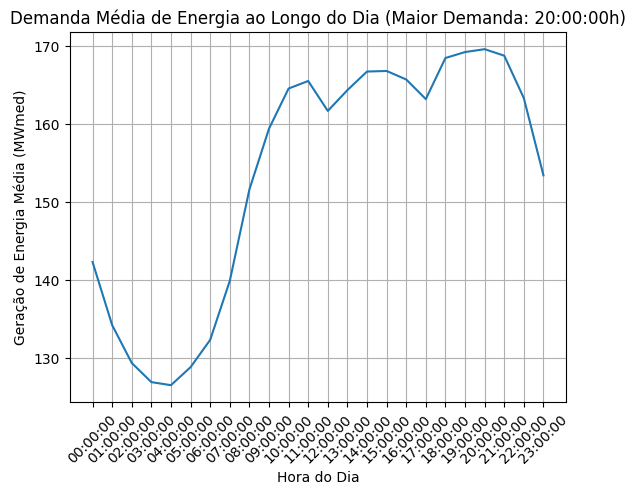

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv(
    filepath_or_buffer="https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA_2014.csv",
    sep=';'
)

# Comando 3: Dividir a coluna 'din_instante' em data e hora
df[['Data', 'Hora']] = df['din_instante'].str.split(' ', expand=True)

# Converter as colunas de data e hora para os tipos de dados adequados
df['Data'] = pd.to_datetime(df['Data'])
df['Hora'] = pd.to_datetime(df['Hora']).dt.time

# Calcular a média de geração de energia para cada semi-hora do dia ao longo de todo o horizonte temporal
media_geracao_por_hora = df.groupby(df['Hora'])['val_geracao'].mean()

# Identificar a semi-hora específica que teve a maior demanda média de energia
hora_maior_geracao = media_geracao_por_hora.idxmax()

# Visualizar a distribuição da demanda de energia ao longo do dia utilizando gráficos de linha
plt.plot(media_geracao_por_hora.index.astype(str), media_geracao_por_hora.values)
plt.title(f'Demanda Média de Energia ao Longo do Dia (Maior Demanda: {hora_maior_geracao}h)')
plt.xlabel('Hora do Dia')
plt.ylabel('Geração de Energia Média (MWmed)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [8]:
import pandas as pd

# Caminho para o arquivo CSV
file_path = "C:/Users/PC/Desktop/GERACAO_USINA_2014.csv"

# Ler os dados do arquivo CSV
df = pd.read_csv(
    filepath_or_buffer=file_path,
    sep=';',
    decimal=',',
    parse_dates=['din_instante'],  # Informando que a coluna 'din_instante' contém datas
    dayfirst=True  # Indicando que o formato da data é dia/mês/ano
)

# Filtrar para incluir apenas hidrelétricas do Subsistema Sudeste no mês de junho
df_filtered = df[(df['nom_tipousina'] == 'HIDROELÉTRICA') & 
                 (df['nom_subsistema'] == 'SUDESTE') &
                 (df['din_instante'].dt.month == 6)]

# Converter a coluna 'val_geracao' para o tipo numérico
df_filtered['val_geracao'] = pd.to_numeric(df_filtered['val_geracao'], errors='coerce')

# Remover linhas com valores ausentes na coluna 'val_geracao'
df_filtered = df_filtered.dropna(subset=['val_geracao'])

# Agrupar por Unidade Federativa (UF) e Usina Hidrelétrica e calcular a geração total de energia para cada usina em cada UF
grouped = df_filtered.groupby(['nom_estado', 'nom_usina'])['val_geracao'].sum().reset_index()

# Identificar a hidrelétrica que mais gerou energia em cada estado
result_max = grouped.loc[grouped.groupby(['nom_estado'])['val_geracao'].idxmax()].reset_index(drop=True)

# Identificar a hidrelétrica que menos gerou energia em cada estado
result_min = grouped.loc[grouped.groupby(['nom_estado'])['val_geracao'].idxmin()].reset_index(drop=True)

# Combinar os resultados em uma única tabela
result_combined = pd.merge(result_max, result_min, on='nom_estado', suffixes=('_maior', '_menor'))

# Renomear colunas para melhor identificação
result_combined.rename(columns={'nom_usina_maior': 'Usina com Maior Geração', 
                                 'val_geracao_maior': 'Geração de Energia (Maior)',
                                 'nom_usina_menor': 'Usina com Menor Geração', 
                                 'val_geracao_menor': 'Geração de Energia (Menor)'}, inplace=True)

# Exibir o resultado
print(result_combined)


            nom_estado                      Usina com Maior Geração  \
0     DISTRITO FEDERAL      Pequenas Centrais Hidroelétricas da Ceb   
1       ESPIRITO SANTO  Pequenas Centrais Hidroelétricas da Escelsa   
2                GOIAS                            Cachoeira Dourada   
3          MATO GROSSO    Pequenas Centrais Hidroelétricas da Cemat   
4   MATO GROSSO DO SUL                                       Buriti   
5         MINAS GERAIS     Pequenas Centrais Hidrelétricas da Cemig   
6                 PARA                                  Salto Curuá   
7       RIO DE JANEIRO                                 Nilo Peçanha   
8             RONDONIA                                Santo Antônio   
9            SAO PAULO                              Porto Primavera   
10           TOCANTINS                                Peixe Angical   

    Geração de Energia (Maior)                  Usina com Menor Geração  \
0                       6012.0  Pequenas Centrais Hidroelétricas da Ceb 

C:\Users\PC\AppData\Local\Temp\ipykernel_8724\2040933810.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['val_geracao'] = pd.to_numeric(df_filtered['val_geracao'], errors='coerce')


In [7]:
import pandas as pd

# Carregar os dados diretamente do URL
df = pd.read_csv(
    filepath_or_buffer="https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/geracao_usina_2_ho/GERACAO_USINA_2014.csv",
    sep=';'
)

# Remover o horário da coluna 'din_instante'
df['din_instante'] = pd.to_datetime(df['din_instante']).dt.date

# Filtrar para incluir apenas hidrelétricas do Subsistema Sudeste no mês de junho
df_filtered = df[(df['nom_tipousina'] == 'HIDROELÉTRICA') & 
                 (df['nom_subsistema'] == 'SUDESTE') &
                 (pd.to_datetime(df['din_instante'], format='%Y-%m-%d').dt.month == 6)]

# Converter a coluna 'val_geracao' para o tipo numérico
df_filtered['val_geracao'] = pd.to_numeric(df_filtered['val_geracao'], errors='coerce')

# Remover linhas com valores ausentes na coluna 'val_geracao'
df_filtered = df_filtered.dropna(subset=['val_geracao'])

# Agrupar por Unidade Federativa (UF) e Usina Hidrelétrica e calcular a geração total de energia para cada usina em cada UF
grouped = df_filtered.groupby(['nom_estado', 'nom_usina'])['val_geracao'].sum().reset_index()

# Identificar a hidrelétrica que mais gerou energia em cada estado
result_max = grouped.loc[grouped.groupby(['nom_estado'])['val_geracao'].idxmax()].reset_index(drop=True)

# Identificar a hidrelétrica que menos gerou energia em cada estado
result_min = grouped.loc[grouped.groupby(['nom_estado'])['val_geracao'].idxmin()].reset_index(drop=True)

# Combinar os resultados em uma única tabela
result_combined = pd.merge(result_max, result_min, on='nom_estado', suffixes=('_maior', '_menor'))

# Renomear colunas para melhor identificação
result_combined.rename(columns={'nom_usina_maior': 'Usina com Maior Geração', 
                                 'val_geracao_maior': 'Geração de Energia (Maior)',
                                 'nom_usina_menor': 'Usina com Menor Geração', 
                                 'val_geracao_menor': 'Geração de Energia (Menor)'}, inplace=True)

# Exibir o resultado
print(result_combined)


            nom_estado                      Usina com Maior Geração  \
0     DISTRITO FEDERAL      Pequenas Centrais Hidroelétricas da Ceb   
1       ESPIRITO SANTO  Pequenas Centrais Hidroelétricas da Escelsa   
2                GOIAS                                Serra da Mesa   
3          MATO GROSSO    Pequenas Centrais Hidroelétricas da Cemat   
4   MATO GROSSO DO SUL                                       Buriti   
5         MINAS GERAIS                                    São Simão   
6                 PARA                                  Salto Curuá   
7               PARANA                                 Itaipu 60 Hz   
8       RIO DE JANEIRO                                 Nilo Peçanha   
9             RONDONIA                                Santo Antônio   
10           SAO PAULO                                Ilha Solteira   
11           TOCANTINS                                      Lajeado   

    Geração de Energia (Maior)                   Usina com Menor Geração  \


C:\Users\PC\AppData\Local\Temp\ipykernel_8724\1340535840.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['val_geracao'] = pd.to_numeric(df_filtered['val_geracao'], errors='coerce')
